C:\Users\Matthew\Dropbox\github_repos\smbh_crtitical_times\figures\figures


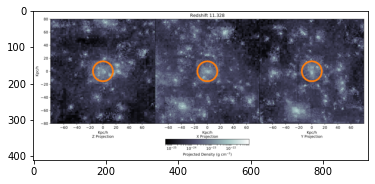

In [12]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm as cm
import os
import glob
import io
import fitz
from PIL import Image

def generate_video():
    print(os.getcwd())

    path = "C:/Users/Matthew/Dropbox/github_repos/smbh_crtitical_times/figures/figures"
    os.chdir(path)
    imgs = glob.glob("*.pdf") # some array of images
    
    frames = [] # for storing the generated images
    fig = plt.figure()
    
    for x in range(len(imgs)):
        pdf_file = fitz.open(imgs[x])
        for page_number in range(len(pdf_file)):
            page = pdf_file[page_number]
            rgb = page.get_pixmap()
            pil_image = Image.open(io.BytesIO(rgb.tobytes())).convert('RGB')
            imgs[x] = pil_image
    

    for i in range(len(imgs)):
        frames.append([plt.imshow(imgs[i], cmap=cm.Greys_r,animated=True)])

    ani = animation.ArtistAnimation(fig, frames, interval=500, blit=True)
    ani.save('collision.mp4')
    plt.show()
    
generate_video()